In [1]:
import numpy as np
import random

# import torch
# import torch.nn as nn
# import torch.nn.functional as func
# import torch.optim as optim

from matplotlib import pyplot as plt

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [5]:
# ==========
# helping methods
# ==========

# generate a list from lower and upper bound
def gen_list(p0, pn, delta, dig=5):
    ret = []
    i = p0
    while i < pn:
        ret.append(float(i))
        i += delta
        i = round(i, dig)
    return ret

# padding and zero padding
def padding(origin, a_list, b_list):
    return np.hstack((a_list, origin, b_list))

def zero_padding(origin, num):
    zero_list = [0 for i in range(num)]
    return padding(origin, zero_list, zero_list)

# trainning pairs
def gen_pair(u, x, t, length=3, num=1000):
    pairs = []
    for i in range(num):
        r = random.randint(0, t-2)
        current_t = u[r]
        next_t = u[r+1]
        p = random.randint(length, x-1-length)
        train = current_t[p-length:p+length+1]
        solu = next_t[p]
        pair = {'input': train, 'solu': solu}
        pairs.append(pair)
    return pairs

In [6]:
# the analytical representation of exact solution
def heat_equ_analytical_solu(x, t):
    return np.sin(np.pi * x) * np.exp(-np.power(np.pi, 2) * t)

In [8]:
def calc_next_time(current, model, length=3):
    ret = []
    p = np.hstack(([0 for i in range(length)], current, [0 for i in range(length)])).tolist()
    for index in range(len(current)):
        i = index + 3
        seg = p[i-length:i+length+1]
        tensor_seg = torch.FloatTensor(seg)
        out = model(tensor_seg)
        ret.append(out.item())
    return ret

## $\Delta x=\frac{1}{20}$

In [9]:
x_1 = arange(0, 2 * np.pi, 1/20)
t_1 = arange(0, 2 * np.pi, 1/20)
X_1,T_1 = meshgrid(x_1, t_1) # grid of point
Z_1 = heat_equ_analytical_solu(X_1, T_1) # evaluation of the function on the grid

In [2]:
import csv

prediction_1_str = []
with open('prediction_1.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i%2==0:
            prediction_1_str.append(row)
            
prediction_1 = []
for p in prediction_1_str:
    prediction_1.append(np.array([float(i) for i in p]))

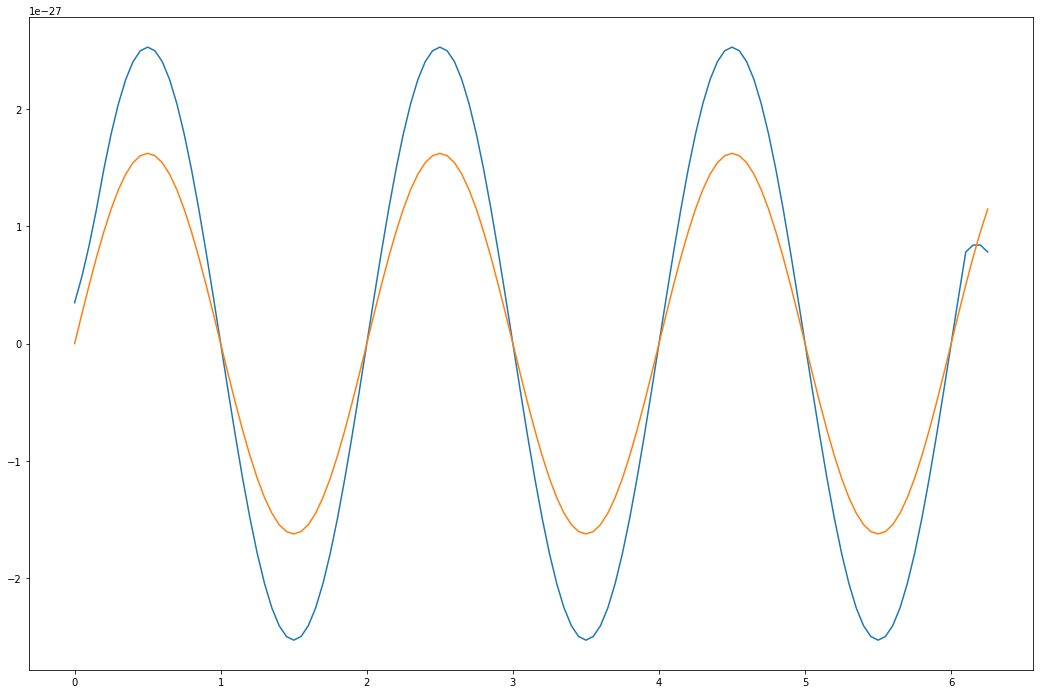

In [12]:
plt.figure(figsize = (18,12))
plt.plot(x_1, prediction_1[len(prediction_1)-1], x_1, Z_1[len(Z_1)-1])

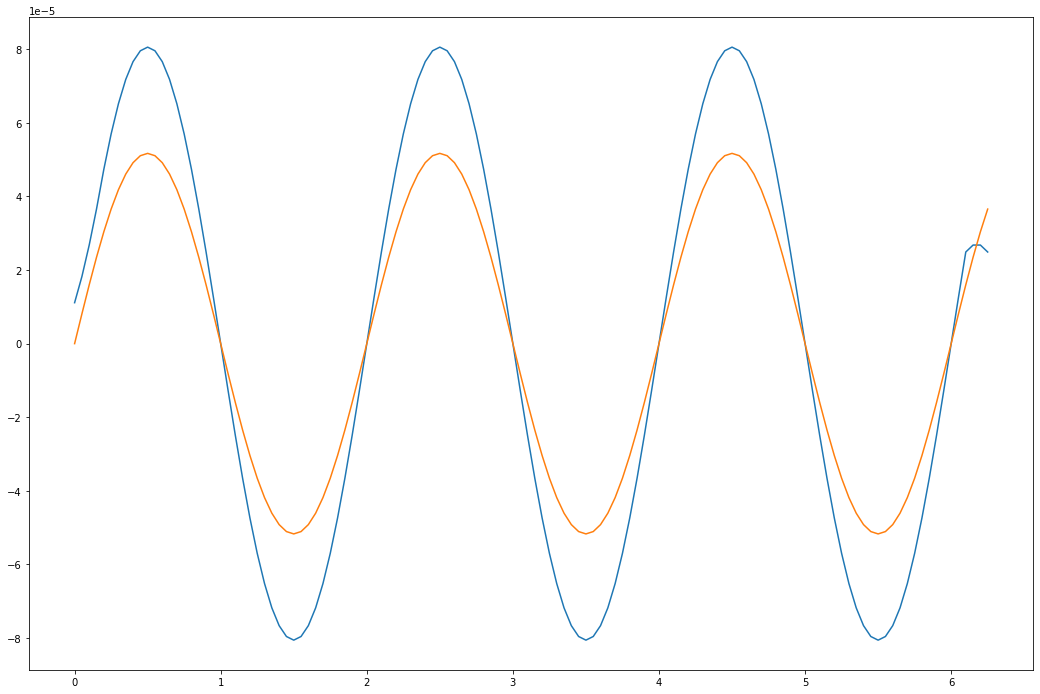

In [14]:
plt.figure(figsize = (18,12))
plt.plot(x_1, prediction_1[20], x_1, Z_1[20])

In [17]:
1/(1/20)* np.linalg.norm(prediction_1-Z_1, ord=2)

67.0073259566918

In [18]:
(prediction_1-Z_1).max()

0.3408595182026781

## $\Delta x=\frac{1}{40}$

In [19]:
x_2 = arange(0, 2 * np.pi, 1/40)
t_2 = arange(0, 2 * np.pi, 1/40)
X_2,T_2 = meshgrid(x_2, t_2) # grid of point
Z_2 = heat_equ_analytical_solu(X_2, T_2) # evaluation of the function on the grid

In [20]:
import csv

prediction_2_str = []
with open('prediction_2.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i%2==0:
            prediction_2_str.append(row)
            
prediction_2 = []
for p in prediction_2_str:
    prediction_2.append(np.array([float(i) for i in p]))

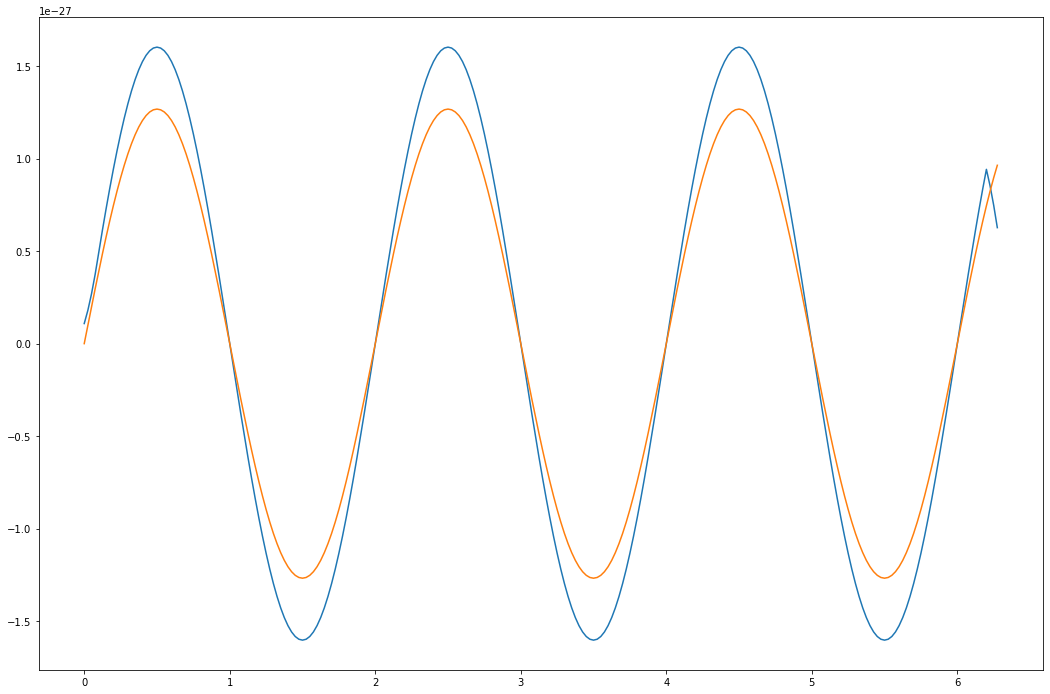

In [21]:
plt.figure(figsize = (18,12))
plt.plot(x_2, prediction_2[len(prediction_2)-1], x_2, Z_2[len(Z_2)-1])

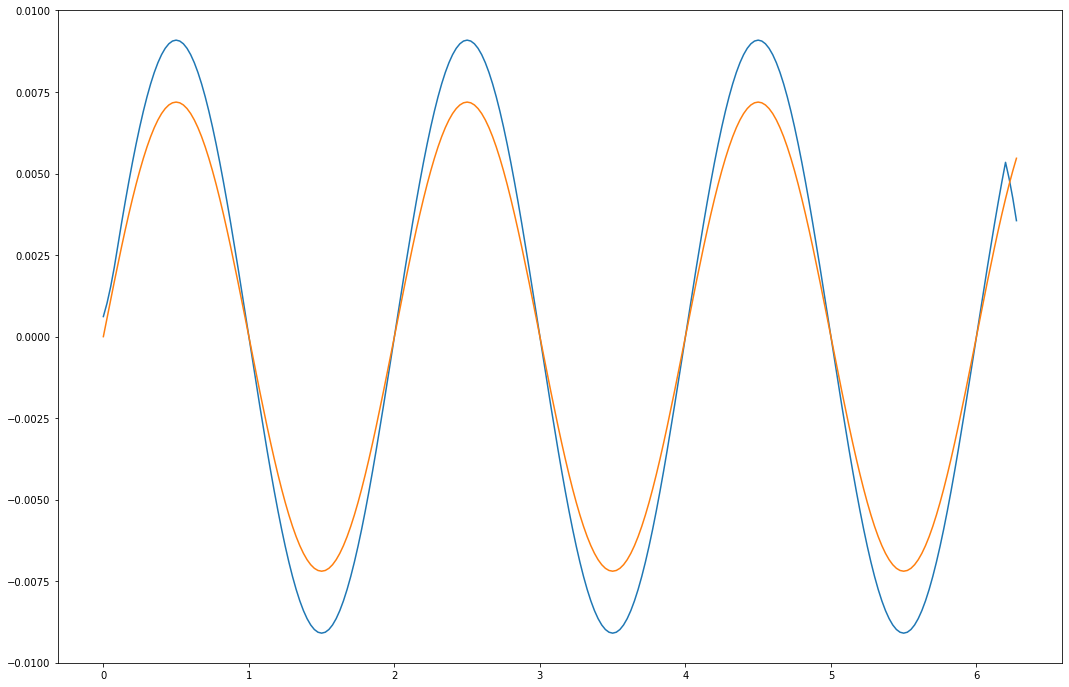

In [22]:
plt.figure(figsize = (18,12))
plt.plot(x_2, prediction_2[20], x_2, Z_2[20])

In [ ]:
1/(1/20)* np.linalg.norm(prediction_1-Z_1, ord=2)